Лабораторная работа 2. На картинке показана динамика роста колонии клеток in vitro на протяжении восьми дней. С помощью моделирования оценить среднюю продолжительность клеточного цикла T_cycle, исходя из итогового размера колонии. Клетки можно считать неподвижными. Средний диаметр клетки 25 мкм, сторона квадрата 1050 мкм.

Предлагаемая модель деления клеток: продолжительность каждого клеточного цикла роста и деления подчиняется нормальному распределению со средним значением T_cycle и среднеквадратичным отклонением 2 часа. 

На протяжении цикла клетка находится в покое (т.е. модель игнорирует детали цикла, такие как увеличение клетки в размерах и синтез ДНК). 

В конце цикла клетка делится на две новых, одна из которых остаётся по её изначальной координате. 

Вторую дочернюю клетку мы пытаемся поместить на расстоянии 2*R от первой в случайно выбранном направлении.

![title](https://sun9-33.userapi.com/impg/6GnXSFZF1FBQmsP7NsLTEuvjKAu7eAAxkeY1WA/-8PwkioDwNw.jpg?size=1280x244&quality=96&sign=548668708b1c0bfa534f84c867e454bf&type=album)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
%matplotlib inline

In [ ]:
class Cell:
    def __init__(self, x, y):
        # cells are squares with side length = 3
        self.d = 3 
        # center coordinates
        self.x = x
        self.y = y
        #
        self.cell_cycle = int(np.random.normal(44*60, 120))
        if self.cell_cycle > 24 * 60:
            # the cell will divide the next day
            self.cell_cycle -= 24 * 60
    
    def coordinates(self):
        # i assume that there will be no cells on the edge of a grid, 
        # as it doesn't have enough space for it
        return np.array([
            [self.x - 1, self.y + 1], [self.x, self.y + 1], [self.x + 1, self.y + 1],
            [self.x - 1, self.y],     [self.x, self.y],     [self.x + 1, self.y],
            [self.x - 1, self.y - 1], [self.x, self.y - 1], [self.x + 1, self.y - 1]])
    
    def divide(self):
        # random place to insert new cell
        if_x = np.random.choice([0, 1, -1])
        if_y = np.random.choice([0, 1, -1])
        x = self.x + self.d * if_x
        y = self.y + self.d * if_y
        return Cell(x, y)
    

In [ ]:
class CellColony:
    def __init__(self):
        self.T = 24 * 60
        self.N = 200 # true N is ~140
        self.grid = np.zeros((self.N, self.N))
        self.cell_storage = []

        # insert first cell
        self.first_cell = Cell(100, 100)
        self.insert_cell(self.first_cell)

        
        
    def insert_cell(self, cell):
        coords = cell.coordinates()
        
        # check how pany pixels are occupied with cell 
        free_space = sum([1 for i, k in coords if self.grid[i, k] != 0])
        
        # if there is space we place new cell
        if free_space == 0:

            self.cell_storage.append(cell)

            cell_id = np.random.randint(1, 255)
            for i, j in coords:
                self.grid[i, j] = cell_id
                
        # otherwise throw an exception        
        else:
            raise RuntimeError('Place is occupied')    

    def division(self, cell):
        new_cell = cell.divide()
        
        try:
            self.insert_cell(new_cell)
            #print('new cell is placed')
            
            
        except IndexError:
            print('edge of grid: no space for a cell')

            
        except RuntimeError:
            # central coordinates
            x, y = cell.x, cell.y
            
            # neighbouring area
            area = self.grid[x-4:x+5, y-4:y+5]
            
            # find available slots
            places = np.where(area==0)
            available = list(zip(places[0], places[1]))
            #print(available)
            
            if len(available) < 9:
                # if there are no slots
                print('no vacant places around')
                
            else:
                cell_id = np.random.randint(1, 255)
                #print('trying to find free space for a cell...')
                for i, j in available[:3]:
                    area[i, j] = cell_id
                    area[i+1, j] = cell_id
                    area[i+2, j] = cell_id

                new_cell = Cell(x-4+i+1, y-4+j-1)
                self.cell_storage.append(new_cell)
                #print('new cell is placed')
                
            
        #finally:
            #print('division ended')


                
    def process(self):
        for sec in range(self.T):
            for cell in self.cell_storage:
                if cell.cell_cycle == sec:
                    self.division(cell)
                    clear_output(wait=False)


There are approximately 190 cells in colony in the picture. So, duration of cell cycle is about 45 hours

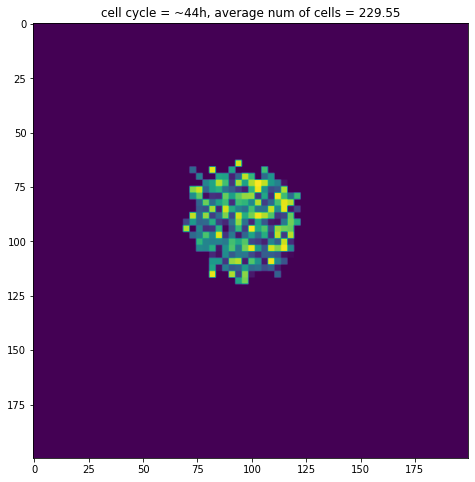

In [ ]:
num_cells = []
for _ in range(20):
    colony = CellColony()
    for _ in range(8):
        colony.process()
    num_cells.append(len(colony.cell_storage))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(colony.grid)
plt.title(f'cell cycle = ~44h, average num of cells = {sum(num_cells)/20}');

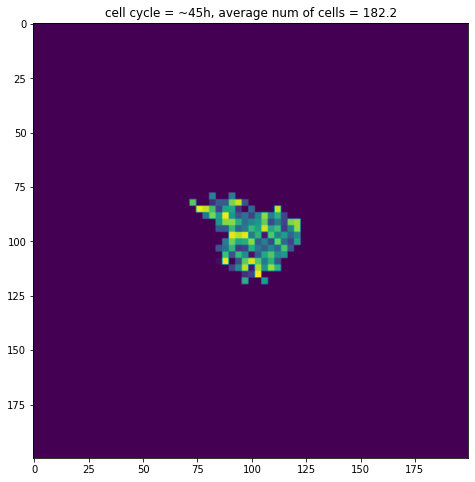

In [ ]:
num_cells = []
for _ in range(20):
    colony = CellColony()
    for _ in range(8):
        colony.process()
    num_cells.append(len(colony.cell_storage))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(colony.grid)
plt.title(f'cell cycle = ~45h, average num of cells = {sum(num_cells)/20}');

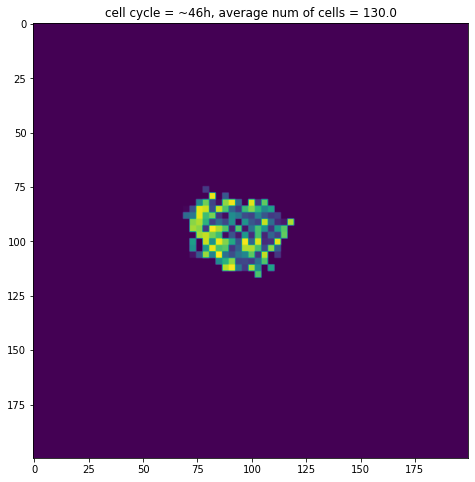

In [ ]:
num_cells = []
for _ in range(20):
    colony = CellColony()
    for _ in range(8):
        colony.process()
    num_cells.append(len(colony.cell_storage))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(colony.grid)
plt.title(f'cell cycle = ~46h, average num of cells = {sum(num_cells)/20}');

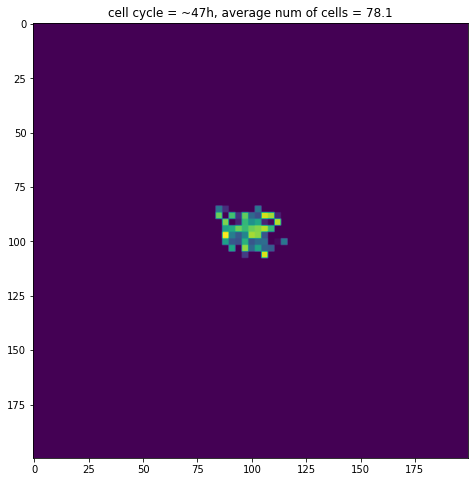

In [ ]:
num_cells = []
for _ in range(20):
    colony = CellColony()
    for _ in range(8):
        colony.process()
    num_cells.append(len(colony.cell_storage))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(colony.grid)
plt.title(f'cell cycle = ~47h, average num of cells = {sum(num_cells)/20}');